# Linear Regression
## loading data

판다스는 데이터 분석에 사용되는 라이브러리이다  

head() : data frame내의 처음 몇 줄을 출력한다(default = 5)  
describe() : data frame의 간단한 통계 정보를 출력한다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("Uni_linear.txt", header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2]:
data.describe() 

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Ploting of Data

맷플롭립은 그래프 생성/분석 등의 기능을 하는 라이브러리이다  

scatter() : 산점도 생성  
xticks(), yticks() : x, y축 눈금 생성  
xlabel(), ylabel() : x. y축 라벨 생성  
title() : 차트 제목 생성  

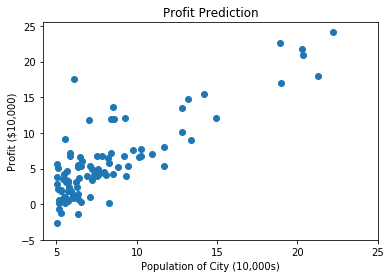

In [3]:
plt.scatter(data[0], data[1])
plt.xticks(np.arange(5, 30, step = 5))
plt.yticks(np.arange(-5, 30, step = 5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Prediction")
plt.show()

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$  

넘파이는 데이터 분석에 쓰이고 벡터 및 행렬연산에 최적화된 라이브러리이다  

squrae&#95;err : $(h_{\theta}(x^{(i)})-y^{(i)})^2$

prediction : $h_{\theta}(x^{(i)})$

X : 0열은 1로 채워지고 1열은 data_n의 0번 열로 채워짐 (m, 2)  
y : data_n의 1번 열 (m, 1)  
theta : 0으로 채워진 2차원 벡터 (2, 1) = $\theta_j$

len() : 행의 개수  
dot() : 행렬의 곱셈  
sum() : 합  
append() : 배열의 끝에 값을 추가, axis = 배열이 추가되는 방향  
reshape() : 지정한대로 행렬의 형태 변경  
ones() : 1로 채워진 행렬 생성 ((m,1) = m차원 벡터)  
zeros() : 0으로 채워진 행렬 생성 ((2,1) = 2차원 벡터)

pandas.values() : 데이터의 값들

In [4]:
def computeCost(X, y, theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

data_n = data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computeCost(X,y,theta)

32.072733877455676

## Gradient Descent

cost function $J(\theta)$의 최소값 찾기  
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$ (모든 j에 대해 $\theta_j$를 지속적으로 업데이트)  

descent = $\alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$  

error = $\sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$

numpy.transpose() : 전치행렬 생성

round(a, b) : a를 소수 b+1째 자리에서 반올림 (생략시 b = 0)  
str() : 문자열 형태로 객체를 반환

In [5]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error=np.dot(X.transpose(),(predictions-y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
        
    return theta, J_history

theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


## Axes3D로 3차원 그래프 생성

linspace() : 시작점과 끝점을 균일 간격으로 나눈 점들을 생성

figure() : 맷플롯립에서 사용하는 단위, figure를 초기화하는 함수  
add_subplot() : figure안에 들어가는 plot하나가 subplot이고 해당 함수는 subplot을 추가함. (111 = 1x1 그리드의 첫 번째 subplot, projection = subplot의 타입)  
plot_surface() : surface plot을 생성(X,Y,Z축 항목과 컬러 지정)

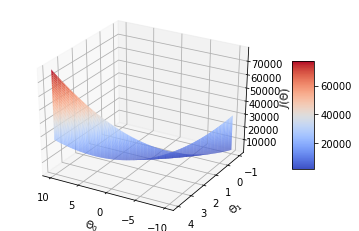

In [6]:
from mpl_toolkits.mplot3d import Axes3D

theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

ax.view_init(30,120)

## Testing the implementation

반복 횟수에 따른 $J(\theta)$의 변화

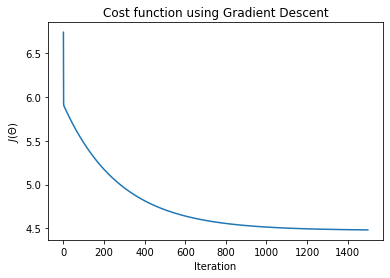

In [7]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

## Graph with Line of Best Fit

예측 모델을 그래프에 표현

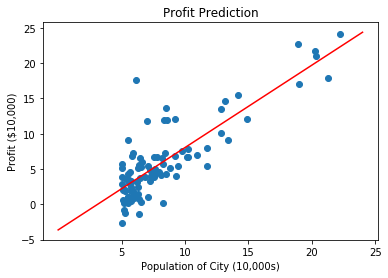

In [8]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Prediction")
plt.show()

## Make predictions using the optimized $\theta$ values

$h_\theta(x)=\theta^Tx$

위에서 구한 $\theta^T$를 이용해 특정 도시 인구수에서의 수입을 예측할 수 있다

In [9]:
def predict(x,theta):
    predictions=np.dot(theta.transpose(),x)
    
    return predictions[0]

predict1 = predict(np.array([1,3.5]),theta)*10000
predict2 = predict(np.array([1,7]),theta)*10000

print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))

For population = 35,000, we predict a profit of $4520.0
For population = 70,000, we predict a profit of $45342.0


# Multivariable Linear Regression
## Loading of Data

In [10]:
data2=pd.read_csv("Multi_linear.txt", header=None)
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
data2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## Ploting of Data